# Featureization for Learning from Data


<center><img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*XOOXIhOg8TjR5Yw7P7EsuA.jpeg" alt="Drawing" style="width: 600px; height: 330px;" /></center>

<div style="text-align: right"> 
  <small>medium.com</small>
</div>


© 2023 [University of Illinois at Chicago](https://www.uic.edu/). All rights reserved.

## Learning Objectives

1. [Feature Engineering for Machine Learning Models](#Feature-Engineering-for-Machine-Learning-Models)

2. [Feature Cleaning](#Feature-Cleaning)

   - Methods of removing outliers:
     - Using percentiles.
     - Using Z-score and Standard Deviation.
     - Outlier removal using Interquartile range (IQR).

3. [Feature Preprocessing](#Feature-Preprocessing)

   - Imputation of missing values.
   - Generating polynomial features.
   - Normalization.

4. [Fingerprinting and Generation of Feature Vectors](#Fingerprinting-and-Generation-of-Feature-Vectors)

   - Local and global features.
   - Elemental properties and Magpie descriptors.
   - Structural descriptors: SOAP.


## Feature Engineering for Machine Learning Models


Feature engineering is a critical step in any  machine learning pipeline. It involves creating, selecting, and transforming features to improve the performance of your models. Effective feature engineering can lead to more accurate predictions and better model outcomes.

Key aspects of feature engineering include:

- **Feature Cleaning:** Removing outliers and handling noisy data to ensure the quality of input features.
- **Feature Preprocessing:** Imputing missing values, generating polynomial features, and normalizing data to prepare it for modeling.
- **Fingerprinting and Feature Vectors:** Extracting informative features, such as local and global characteristics, elemental properties, and structural descriptors, for specialized tasks.

Remember that the quality and relevance of your features can significantly impact the success of your machine learning models. Careful consideration and experimentation with feature engineering techniques are essential for achieving optimal results.

For example, in materials science, the feature space can be segmented into different categories. The choice of sections may vary based on the specific problems at hand.





<center><img src="Segmented_fea_space.png" alt="Drawing" style="width: 500px; height: 330px;" /></center>

<div style="text-align: right"> 
  <small>DOI: 10.26434/chemrxiv-2023-07vcr-v2</small>
</div>






## Feature Cleaning


### Methods of Removing Outliers

**Using Percentiles**

Remove data points that fall below or above a certain percentile threshold. This helps in eliminating extreme values.
   

In [1]:
import numpy as np

import numpy as np

# Set a random seed for reproducibility
np.random.seed(0)

# Generate inliers following a normal distribution
inliers = np.random.normal(0, 0.5, 100)

# Generate outliers
outliers = np.random.uniform(low=-5, high=5, size=10)

# Concatenate the inliers with the outliers
array = np.concatenate([inliers, outliers])


(array([ 1.,  5.,  7., 13., 17., 18., 16., 11.,  7.,  5.]),
 array([-1.27649491, -1.03535769, -0.79422046, -0.55308324, -0.31194602,
        -0.0708088 ,  0.17032842,  0.41146565,  0.65260287,  0.89374009,
         1.13487731]),
 <BarContainer object of 10 artists>)

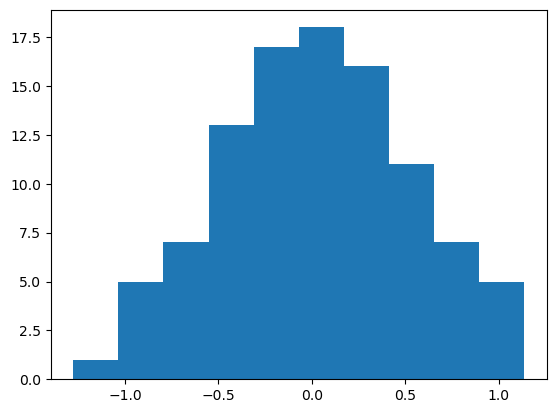

In [2]:
import matplotlib.pyplot as plt

plt.hist(inliers,bins=10)# data without outliers

(array([ 1.,  1.,  0.,  0.,  3.,  2., 25., 47., 25.,  6.]),
 array([-4.80806802, -4.16708768, -3.52610734, -2.885127  , -2.24414666,
        -1.60316632, -0.96218598, -0.32120564,  0.3197747 ,  0.96075504,
         1.60173537]),
 <BarContainer object of 10 artists>)

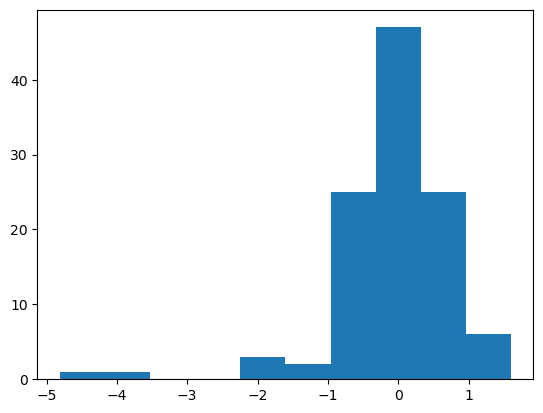

In [3]:
plt.hist(array,bins=10)# data that include outliers


**Removing data points below the 5th percentile and above the 95th percentile**

(array([ 5.,  7., 10.,  9., 14., 17., 14.,  8.,  9.,  5.]),
 array([-0.99039823, -0.79656395, -0.60272967, -0.40889539, -0.21506111,
        -0.02122682,  0.17260746,  0.36644174,  0.56027602,  0.75411031,
         0.94794459]),
 <BarContainer object of 10 artists>)

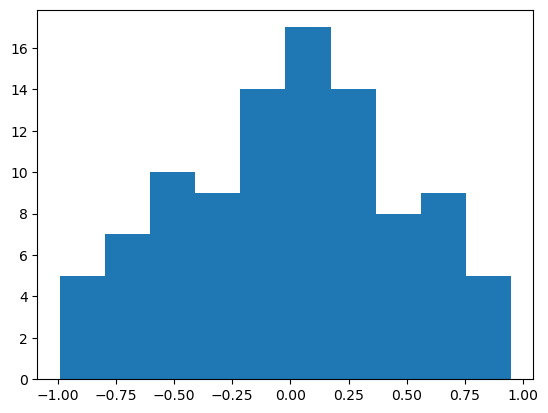

In [4]:
lower = np.percentile(array , 5)
upper = np.percentile(array, 95)
filtered_array = array[(array > lower) & (array < upper)]

plt.hist(filtered_array)

**Using Z-score and Standard Deviation:**

Calculate the Z-score for each data point and remove those with Z-scores exceeding a threshold

In [5]:
from scipy import stats 

z_scores = np.abs(stats.zscore(array))
threshold = 2
cleaned_data =  array[(z_scores < threshold)]

Using scikit-learn (same as standard scalar transfomration)

In [6]:
from sklearn.preprocessing import StandardScaler

z_scores = np.abs(StandardScaler().fit_transform(array.reshape(-1,1)).flatten())
threshold = 2
cleaned_data =  array[(z_scores < threshold)]


(array([ 2.,  9., 12., 17., 22., 19., 11.,  8.,  4.,  1.]),
 array([-1.27649491, -0.98867188, -0.70084885, -0.41302582, -0.12520279,
         0.16262023,  0.45044326,  0.73826629,  1.02608932,  1.31391235,
         1.60173537]),
 <BarContainer object of 10 artists>)

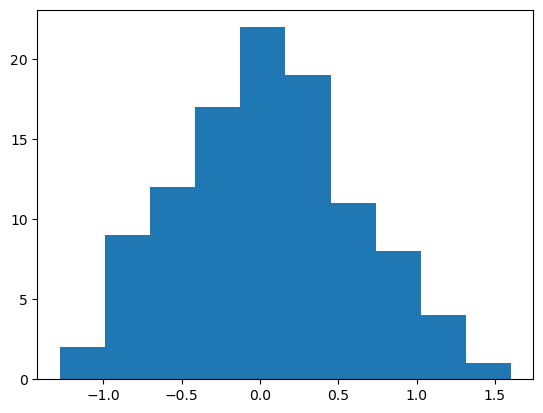

In [7]:
plt.hist(cleaned_data)

**Outlier Removal using Interquartile Range (IQR):**

Identify outliers based on the Interquartile Range. Data points outside the range defined by Q1 - 1.5 * IQR and Q3 + 1.5 * IQR are removed.

In [8]:
q1 = np.percentile(array, 25)
q3 = np.percentile(array, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
cleaned_data = array[(array >= lower_bound) & (array <= upper_bound)]

(array([ 1.,  5.,  9., 13., 18., 20., 14., 10.,  8.,  6.]),
 array([-1.27649491, -1.03082999, -0.78516507, -0.53950015, -0.29383523,
        -0.04817031,  0.19749461,  0.44315953,  0.68882445,  0.93448937,
         1.18015429]),
 <BarContainer object of 10 artists>)

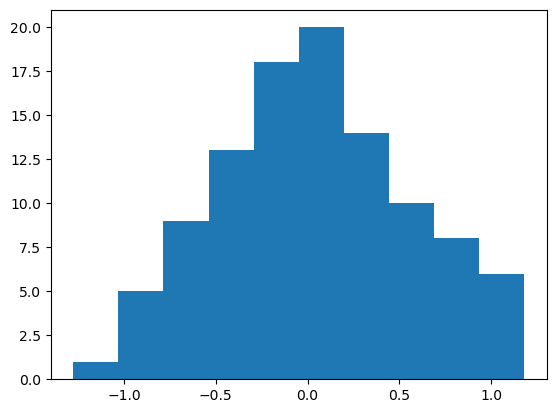

In [9]:
plt.hist(cleaned_data)

## Feature Preprocessing

Feature preprocessing is a crucial step in preparing data for machine learning models. It handles missing data, normalizes scales, captures nonlinearities, removes redundancy, and aids model convergence, ultimately enhancing model performance and accuracy. We should keep a few things in mind: lookout for inconsistencies in the dataset, such as NaN values or missing points, and use strategies to either eliminate the data points or fill the voids. There are various strategies for this purpose.


**Imputation of missing values**

In [10]:
import pandas as pd

data =  pd.read_csv('bandGap_missing.csv')

data.shape

(479, 23)

In [11]:
#features
data.columns

Index(['Number', 'MendeleevNumber', 'AtomicWeight', 'MeltingT', 'Column',
       'Row', 'CovalentRadius', 'Electronegativity', 'NsValence', 'NpValence',
       'NdValence', 'NfValence', 'NValence', 'NsUnfilled', 'NpUnfilled',
       'NdUnfilled', 'NfUnfilled', 'NUnfilled', 'GSvolume_pa', 'GSbandgap',
       'GSmagmom', 'SpaceGroupNumber', 'band_gap'],
      dtype='object')

In [12]:
#Chyeck if there are any nan values
data.isnull().values.any()

True

In [13]:
data.isnull().sum() # Stats of nan values 

Number                6
MendeleevNumber       3
AtomicWeight          7
MeltingT              6
Column                5
Row                   6
CovalentRadius        5
Electronegativity     6
NsValence             7
NpValence             3
NdValence             5
NfValence             6
NValence              7
NsUnfilled           11
NpUnfilled            3
NdUnfilled            5
NfUnfilled            1
NUnfilled             9
GSvolume_pa           4
GSbandgap             9
GSmagmom              5
SpaceGroupNumber      0
band_gap              2
dtype: int64

#### Filling with a constant value

In [14]:
data_new = data.fillna(0)
data_new.isnull().sum() 

Number               0
MendeleevNumber      0
AtomicWeight         0
MeltingT             0
Column               0
Row                  0
CovalentRadius       0
Electronegativity    0
NsValence            0
NpValence            0
NdValence            0
NfValence            0
NValence             0
NsUnfilled           0
NpUnfilled           0
NdUnfilled           0
NfUnfilled           0
NUnfilled            0
GSvolume_pa          0
GSbandgap            0
GSmagmom             0
SpaceGroupNumber     0
band_gap             0
dtype: int64

#### KNN imputation with scikit learn

KNN imputation replaces missing values with the average of the nearest neighbors' values. Adjust the `n_neighbors` parameter for different imputation behavior.

In [15]:
from sklearn.impute import KNNImputer

In [16]:
# Create an instance of KNNImputer
imputer = KNNImputer(n_neighbors=5)  # Choose the number of neighbors

In [17]:
# Fit and transform the data
imputed_data = imputer.fit_transform(data)

imputed_data_df = pd.DataFrame(imputed_data,columns=data.columns)

In [18]:
# Fit and transform the data
imputed_data_df.isnull().sum() 

Number               0
MendeleevNumber      0
AtomicWeight         0
MeltingT             0
Column               0
Row                  0
CovalentRadius       0
Electronegativity    0
NsValence            0
NpValence            0
NdValence            0
NfValence            0
NValence             0
NsUnfilled           0
NpUnfilled           0
NdUnfilled           0
NfUnfilled           0
NUnfilled            0
GSvolume_pa          0
GSbandgap            0
GSmagmom             0
SpaceGroupNumber     0
band_gap             0
dtype: int64

### Q.1 What are the advantages and disadvantages of using constant and KNN imputation?

#### Normalization

From the scikit-learn library, `MinMaxScaler` scales features to a specified range, typically between 0 and 1. On the other hand, `StandardScaler` standardizes features to have a mean of 0 and a standard deviation of 1. Choose the one that best suits your data and modeling requirements.

In [19]:
from sklearn.preprocessing import MinMaxScaler


In [20]:
# we will use imputed data because they cannot handle NAN values

imputed_data_df_scaled = MinMaxScaler().fit_transform(imputed_data_df)
imputed_data_df_scaled

array([[0.00000000e+00, 9.71910112e-01, 0.00000000e+00, ...,
        0.00000000e+00, 8.28480788e-01, 5.81688574e-01],
       [8.94632207e-02, 8.91853933e-01, 7.45602446e-02, ...,
        0.00000000e+00, 4.70832551e-01, 4.77013573e-01],
       [4.17495030e-02, 6.60112360e-01, 3.69413091e-02, ...,
        0.00000000e+00, 8.71944984e-01, 4.90988999e-01],
       ...,
       [3.54870775e-01, 6.06741573e-01, 3.44720056e-01, ...,
        2.44547384e-01, 8.66977647e-01, 0.00000000e+00],
       [7.03777336e-01, 4.52247191e-01, 6.81814816e-01, ...,
        1.00284454e-06, 8.71944984e-01, 0.00000000e+00],
       [7.00795229e-01, 5.25280899e-01, 6.75874105e-01, ...,
        3.55865044e-06, 8.71944984e-01, 0.00000000e+00]])

In [21]:
np.min(imputed_data_df_scaled,axis=0),np.max(imputed_data_df_scaled,axis=0)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.]))

In [22]:
from sklearn.preprocessing import StandardScaler


In [23]:
imputed_data_df_scaled = StandardScaler().fit_transform(imputed_data_df)
imputed_data_df_scaled

array([[-2.03855593,  2.1970889 , -1.91508634, ..., -0.3107822 ,
         0.4847372 ,  2.49517359],
       [-1.59126825,  1.68023306, -1.53954357, ..., -0.3107822 ,
        -0.94428264,  1.9526034 ],
       [-1.82982168,  0.18407143, -1.72902148, ..., -0.3107822 ,
         0.6584028 ,  2.02504333],
       ...,
       [-0.26431479, -0.16049913, -0.17881086, ...,  1.63191952,
         0.6385553 , -0.51993866],
       [ 1.48010717, -1.15794022,  1.51905778, ..., -0.31077423,
         0.6584028 , -0.51993866],
       [ 1.46519758, -0.68642261,  1.48913578, ..., -0.31075393,
         0.6584028 , -0.51993866]])

In [24]:
np.std(imputed_data_df_scaled,axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

## Fingerprinting and Generation of Feature Vectors


Fingerprinting is a method of representing the complex space in an informative, unique, and accurate manner, allowing insightful information to be extracted from it, either through dimensionality reduction or by using a machine learning model. There are many ways in which an atomic system can be represented, using property-based features.

For crystalline systems, you can generate the feature vectors that incorporate chemical information, structural data (atomic coordinates), electronic properties (electron affinity, density), etc. A crystal structure can have two different types of feature vectors: (A) Local feature vectors, where individual atoms in a crystal structure are represented with a set of feature vectors, and the representation of the overall crystal can be done using a matrix. (B) A set of vectors for the overall crystal structure as a whole. It is important to note that the local features can be combined to get a global feature of a crystal structure.

<center><img src="Crystal structure_feature_space.png" alt="Drawing" style="width: 600px; height: 400px;" /></center>

<div style="text-align: right"> 
  <small>https://doi.org/10.1038/s41524-023-01128-y</small>
</div>

The above figure represents metastable states of perovskite nickelates. In terms of feature vectors, different concentrations of proton doping are represented in a 3D space using Principal Component Analysis.


### Elemental Properties and Magpie Descriptors

Magpie is a set of descriptors that contain various elemental properties. We will use the `matminer` library to extract these features from a crystal structure in the `POSCAR` format. We will also use the `pymatgen` library to handle the crystal structure in a Pythonic environment.

In [25]:
# Install the library
! pip install matminer

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [26]:
!pip install pymatgen

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com




We will use three crystal structures to compare: HgS diamond-like structure, Si diamond-like structure, and hexagonal diamond structure of silicon. The first two are similar structurally but different compositionally, while the last three are similar structurally but different compositionally.

Visualize the structures on the Materials Project:

A. [HgS](https://next-gen.materialsproject.org/materials/mp-1123)

B. [Si Diamond](https://next-gen.materialsproject.org/materials/mp-149)

C. [Si Hexagonal Diamond](https://next-gen.materialsproject.org/materials/mp-165?chemsys=Si)

In [27]:
import pandas as pd
from matminer.featurizers.composition import ElementProperty
from pymatgen.core import Structure,Lattice
from pymatgen.core.composition import Composition

In [28]:
#-------read the crystal structures---------------

HgS = Structure.from_file('HgS_Diamond.POSCAR')
Si_Diamond = Structure.from_file('Si _Diamond.POSCAR')
Si_Diamond_hex = Structure.from_file('Si_Hexagonal_Diamond.POSCAR')

In [29]:
df = pd.DataFrame([[HgS, Composition(HgS.formula)],
                   [Si_Diamond, Composition(Si_Diamond.formula)],
                   [Si_Diamond_hex,Composition(Si_Diamond_hex.formula)]],
                  columns=['structure','composition'])
df

,structure,composition
0,"[[0. 0. 0.] Hg, [5.00000000e-16 2.96966253e+00...","(Hg, S)"
1,"[[4.08277678 4.08277678 1.36092559] Si, [4.500...",(Si)
2,"[[1.91565873 1.10600608 0.39901535] Si, [ 1.91...",(Si)


In [30]:
feat_magpie = ElementProperty.from_preset(preset_name="magpie")
feat_magpie

ElementProperty(data_source=<matminer.utils.data.MagpieData object at 0x7f9f3f1e54b0>,
                features=['Number', 'MendeleevNumber', 'AtomicWeight',
                          'MeltingT', 'Column', 'Row', 'CovalentRadius',
                          'Electronegativity', 'NsValence', 'NpValence',
                          'NdValence', 'NfValence', 'NValence', 'NsUnfilled',
                          'NpUnfilled', 'NdUnfilled', 'NfUnfilled', 'NUnfilled',
                          'GSvolume_pa', 'GSbandgap', 'GSmagmom',
                          'SpaceGroupNumber'],
                stats=['minimum', 'maximum', 'range', 'mean', 'avg_dev',
                       'mode'])

All the properties associated with the Magpie descriptor, and the statistics correspond to different atomic species in a single structure.

In [31]:
df_magpie = feat_magpie.featurize_dataframe(df, col_id="composition") 
df_magpie 

ElementProperty:   0%|          | 0/3 [00:00<?, ?it/s]

,structure,composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,"[[0. 0. 0.] Hg, [5.00000000e-16 2.96966253e+00...","(Hg, S)",16.0,80.0,64.0,48.0,32.0,16.0,71.0,88.0,...,0.0,0.0,0.0,0.0,70.0,166.0,96.0,118.0,48.0,70.0
1,"[[4.08277678 4.08277678 1.36092559] Si, [4.500...",(Si),14.0,14.0,0.0,14.0,0.0,14.0,78.0,78.0,...,0.0,0.0,0.0,0.0,227.0,227.0,0.0,227.0,0.0,227.0
2,"[[1.91565873 1.10600608 0.39901535] Si, [ 1.91...",(Si),14.0,14.0,0.0,14.0,0.0,14.0,78.0,78.0,...,0.0,0.0,0.0,0.0,227.0,227.0,0.0,227.0,0.0,227.0


Let's see how the features compare ----

Text(0, 0.5, 'Feature value')

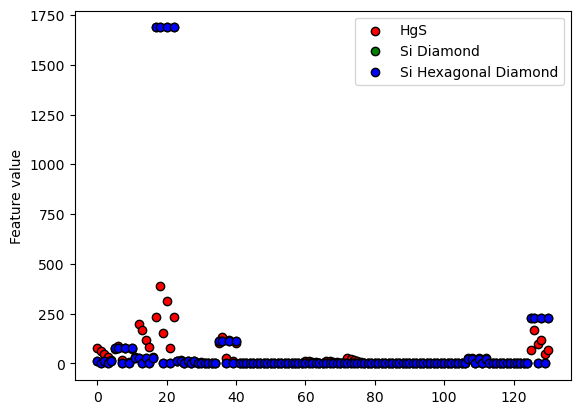

In [32]:
HgS_fea = df_magpie.iloc[0,3:]
Si_dia_fea = df_magpie.iloc[1,3:]
Si_hex_dia_fea = df_magpie.iloc[2,3:]


x_vals = list(range(131))
plt.scatter(x_vals,HgS_fea.values,edgecolor='k' ,color='r',label='HgS')
plt.scatter(x_vals,Si_dia_fea.values,edgecolor='k' ,color='g',label='Si Diamond')
plt.scatter(x_vals,Si_hex_dia_fea.values,edgecolor='k' ,color='b',label='Si Hexagonal Diamond')
plt.legend()
plt.ylabel("Feature value")

The documentation for the `matminer` library is available [here](https://hackingmaterials.lbl.gov/matminer/index.html)

### Q.2 Why do two silicon diamonds have different structures, yet similar descriptors?

### SOAP descriptor

Smooth Overlap of Atomic Positions (SOAP) is a descriptor that encodes regions of atomic geometries by using a local expansion of a Gaussian smeared atomic density with orthonormal functions based on spherical harmonics and radial basis functions. It might sound a bit difficult, but what it does is it takes the atomic coordinates and converts them into a feature vector.

The `dscribe` library has implemented the `SOAP`.

In [33]:
# install the library
! pip install dscribe

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [34]:
from dscribe.descriptors import SOAP
from pymatgen.io.ase import AseAtomsAdaptor

species = ["Hg", "S", "Si"]
rcut = 3.0
nmax = 3
lmax = 3

# Setting up the SOAP descriptor

soap = SOAP(
    species=species,
    periodic=False,
    r_cut=rcut,
    n_max=nmax,
    l_max=lmax,
    average='inner',
)

In [35]:
adp = AseAtomsAdaptor()

soap_Si_Diamond = soap.create(adp.get_atoms(Si_Diamond))
soap_Si_Diamond.shape

(180,)

In [36]:
soap_HgS = soap.create(adp.get_atoms(HgS))
soap_HgS.shape

(180,)

In [37]:
soap_Si_Diamond_hex = soap.create(adp.get_atoms(Si_Diamond_hex))
soap_Si_Diamond_hex.shape

(180,)

Text(0, 0.5, 'Feature value')

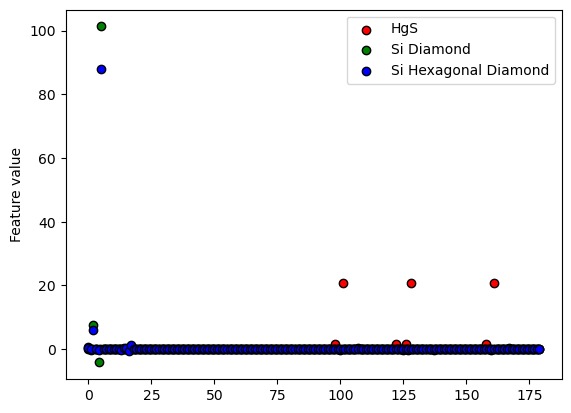

In [38]:
x_vals = list(range(180))
plt.scatter(x_vals,soap_HgS,edgecolor='k' ,color='r',label='HgS')
plt.scatter(x_vals,soap_Si_Diamond,edgecolor='k' ,color='g',label='Si Diamond')
plt.scatter(x_vals,soap_Si_Diamond_hex,edgecolor='k' ,color='b',label='Si Hexagonal Diamond')
plt.legend()
plt.ylabel("Feature value")

Now, we can observe the differences in all three systems, as it accounts for compositional and structural variations. The `SOAP` documentation can be found [here](https://singroup.github.io/dscribe/1.0.x/tutorials/descriptors/soap.html).